In [23]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline


##Simple Function 

example: 

$ y = \cos(2\pi x) $

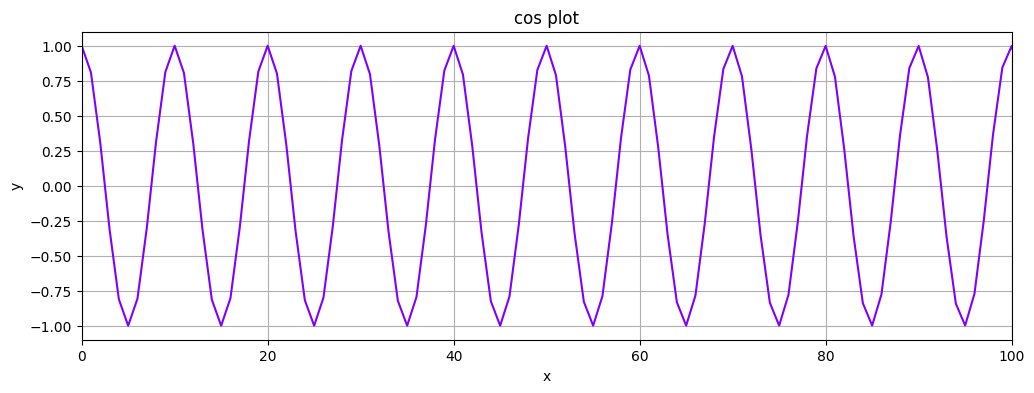

In [4]:
t = np.linspace(0,100,1000)
y = np.cos(t*2*np.pi)
plt.figure(figsize=(12,4))
plt.xlim(0,100)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("cos plot")
plt.plot(y,color='#8000ff')
plt.show()

In [5]:
test_size = 64
dim = 1
y = torch.tensor(y).to(torch.float32)

In [6]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [18]:
# slicing data
def input_data(seq,ws,length):
    out = []
    L = len(seq)
    
    for i in range(L-ws-length+1):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+length]
        out.append((window,label))
    return out

In [19]:
window_size = test_size
train_data = input_data(train_set, window_size, test_size)

In [20]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1d = nn.Conv1d(test_size,64,kernel_size=1)
        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(64,50)
        self.fc2 = nn.Linear(50,test_size)
        
    def forward(self,x):
        x = self.conv1d(x)
        x = self.relu(x)
        x = x.view(-1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
model = CNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
model

CNN(
  (conv1d): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (relu): ReLU(inplace=True)
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=64, bias=True)
)

Epoch 0 Loss: 0.7342150211334229
Performance on test range: 0.4171639084815979


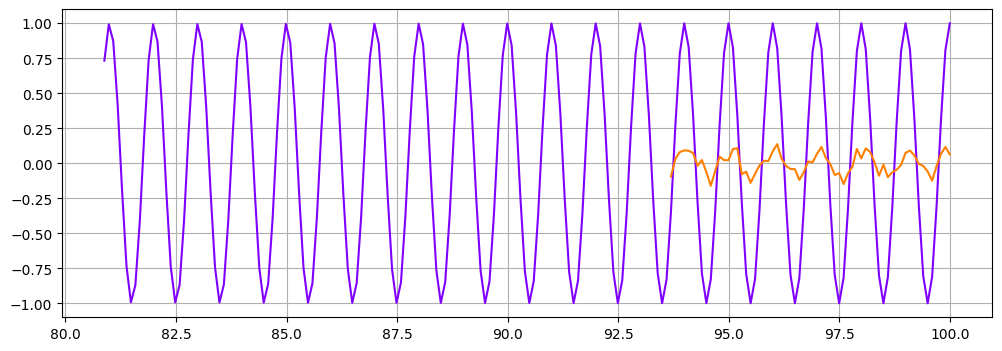

Epoch 1 Loss: 0.6859622597694397
Performance on test range: 0.2796104848384857
Epoch 2 Loss: 0.00741900410503149
Performance on test range: 0.169961616396904
Epoch 3 Loss: 0.005608083680272102
Performance on test range: 0.0687440037727356
Epoch 4 Loss: 0.10229943692684174
Performance on test range: 0.061025045812129974
Epoch 5 Loss: 0.007475526072084904
Performance on test range: 0.06113297864794731
Epoch 6 Loss: 0.007197486236691475
Performance on test range: 0.06867947429418564
Epoch 7 Loss: 0.011446977034211159
Performance on test range: 0.0663832277059555
Epoch 8 Loss: 0.08282522857189178
Performance on test range: 0.06115519627928734
Epoch 9 Loss: 8.536400855518878e-06
Performance on test range: 0.19714264571666718
Epoch 10 Loss: 0.0014898916706442833
Performance on test range: 0.06545575708150864


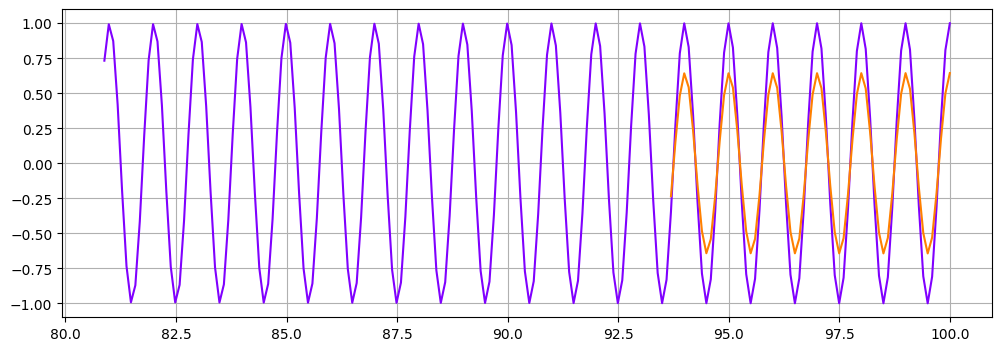

Epoch 11 Loss: 0.00043761622509919107
Performance on test range: 0.06679483503103256
Epoch 12 Loss: 0.03088930994272232
Performance on test range: 0.040292102843523026
Epoch 13 Loss: 0.00162607803940773
Performance on test range: 0.1968822479248047
Epoch 14 Loss: 0.0630025789141655
Performance on test range: 0.33816051483154297
Epoch 15 Loss: 0.0602455772459507
Performance on test range: 0.17484869062900543
Epoch 16 Loss: 0.0043601784855127335
Performance on test range: 0.17633739113807678
Epoch 17 Loss: 0.009629033505916595
Performance on test range: 0.28523850440979004
Epoch 18 Loss: 0.0004481770156417042
Performance on test range: 0.05939916893839836
Epoch 19 Loss: 0.024338912218809128
Performance on test range: 0.6203162670135498
Epoch 20 Loss: 0.0011306290980428457
Performance on test range: 0.0018842528806999326


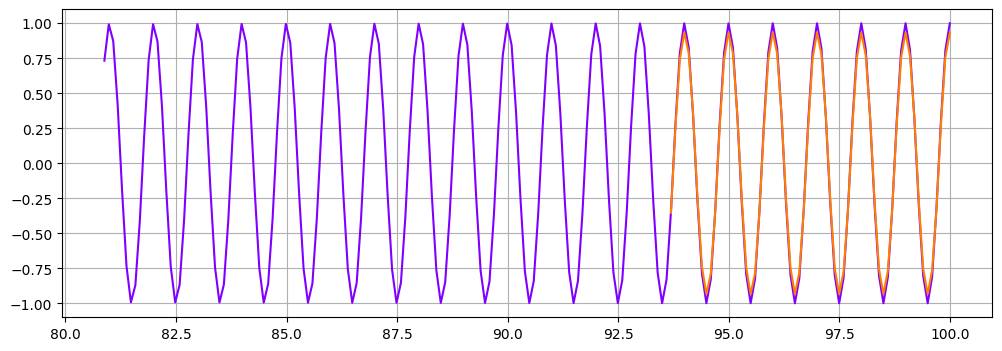

Epoch 21 Loss: 0.20677927136421204
Performance on test range: 0.00021796132205054164
Epoch 22 Loss: 0.0022543552331626415
Performance on test range: 0.01731349341571331
Epoch 23 Loss: 0.00817055068910122
Performance on test range: 0.008324449881911278
Epoch 24 Loss: 0.018554646521806717
Performance on test range: 0.0004285622853785753
Epoch 25 Loss: 0.023771096020936966
Performance on test range: 0.04089060798287392
Epoch 26 Loss: 0.07346753031015396
Performance on test range: 0.001258745789527893
Epoch 27 Loss: 0.025775494053959846
Performance on test range: 0.00048128695925697684
Epoch 28 Loss: 0.02703019790351391
Performance on test range: 0.0007006393279880285
Epoch 29 Loss: 0.0047162179835140705
Performance on test range: 0.00440895976498723
Epoch 30 Loss: 0.00987465213984251
Performance on test range: 0.06163319572806358


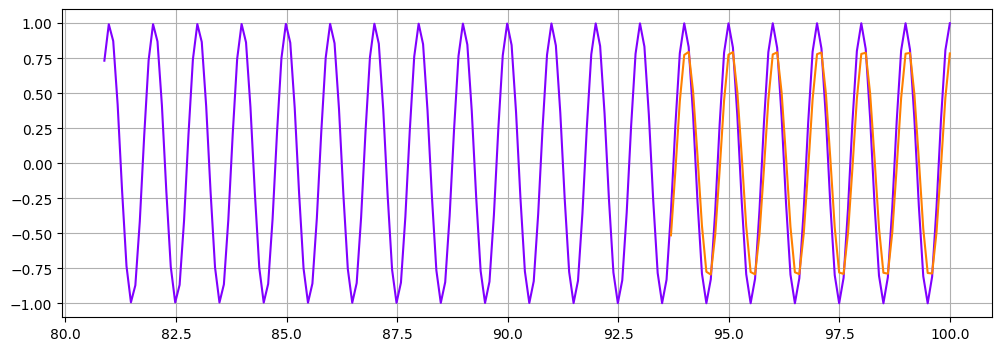

Epoch 31 Loss: 0.010538583621382713
Performance on test range: 0.0013821232132613659
Epoch 32 Loss: 0.0044892760924994946
Performance on test range: 0.0037477659061551094
Epoch 33 Loss: 0.01635405421257019
Performance on test range: 0.0064920163713395596
Epoch 34 Loss: 2.7267797122476622e-06
Performance on test range: 0.001214384101331234
Epoch 35 Loss: 0.09741172939538956
Performance on test range: 0.012404972687363625
Epoch 36 Loss: 9.977080480894074e-05
Performance on test range: 0.03893269598484039
Epoch 37 Loss: 0.012441541068255901
Performance on test range: 0.02111533284187317
Epoch 38 Loss: 0.011686942540109158
Performance on test range: 0.0020336925517767668
Epoch 39 Loss: 0.0011780064087361097
Performance on test range: 0.004664158448576927
Epoch 40 Loss: 0.05671898275613785
Performance on test range: 0.06979627907276154


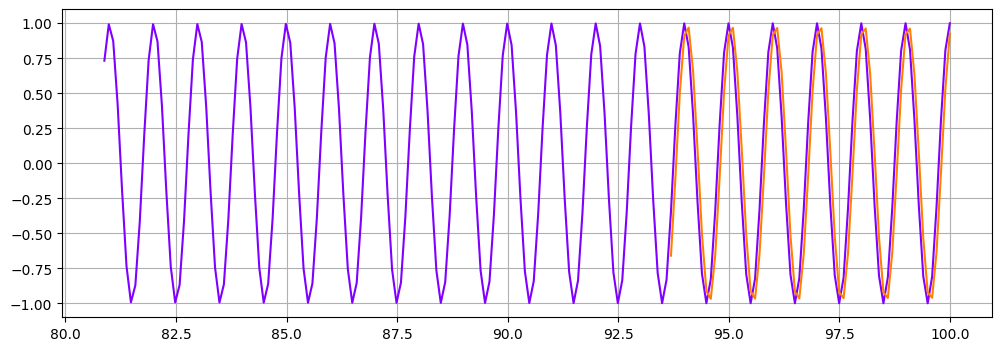

In [22]:
epochs = 41
loss_list = []
for i in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()
        seq = np.reshape(seq, (len(seq),-1))
        seq.to(device)
        y_train.to(device)
        y_pred = model(seq.float())
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = model(np.reshape(y_train[-test_size:],(test_size,1)))
    preds = preds.detach().numpy()
        
    loss = criterion(torch.tensor(preds[-window_size:]), y[-window_size:])
    loss_list.append(loss)
    print(f"Performance on test range: {loss}")
    if i % 10 ==0:
      plt.figure(figsize=(12,4))
      plt.grid(True)
      plt.plot(t[-3*window_size:],y[-3*window_size:],color='#8000ff')
      plt.plot(t[-window_size:],preds,color='#ff8000')
      plt.show()
